In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
file_path = 'Chemical_Fertilizer_Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 2: Encode categorical features
crop_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()

data['Crop'] = crop_encoder.fit_transform(data['Crop'])
data['Fertilizer'] = fertilizer_encoder.fit_transform(data['Fertilizer'])

In [4]:
# Step 3: Split the data into features and target
X = data.drop(columns=['Fertilizer'])
y = data['Fertilizer']

In [5]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}

In [7]:
# Step 6: Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Accuracy of {model_name}: {accuracy:.12f}")

Accuracy of Random Forest: 0.935769656700
Accuracy of Gradient Boosting: 0.647840531561
Accuracy of Decision Tree: 0.963455149502
Accuracy of Extra Trees: 0.961240310078
Accuracy of SVM: 0.305647840532
Accuracy of KNN: 0.550387596899
Accuracy of XGBoost: 0.964562569214


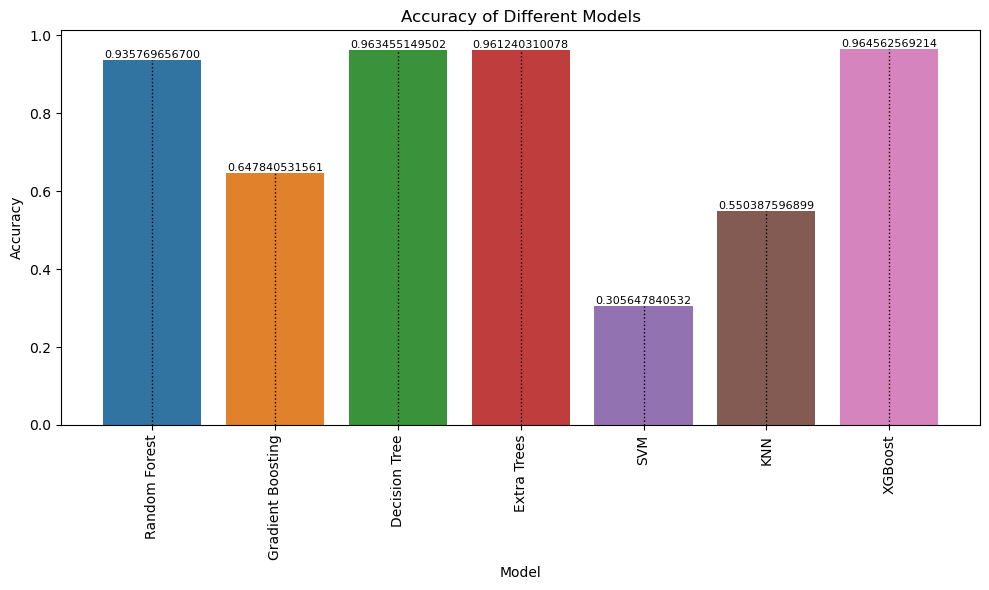

In [8]:
# Step 7: Visualize model accuracies
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Adding dotted lines for accuracy values
for model_name, accuracy in results.items():
    plt.text(model_name, accuracy, f'{accuracy:.12f}', ha='center', va='bottom', fontsize=8, color='black')
    plt.plot([model_name, model_name], [0, accuracy], color='black', linestyle='dotted', linewidth=1)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Step 8: Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [10]:
# Step 9: Train the best model on the full dataset
best_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
# Step 10: Save the trained model
model_path = 'best_model.pkl'
joblib.dump(best_model, model_path)
print(f"The best model ({best_model_name}) is saved as {model_path}")

The best model (XGBoost) is saved as best_model.pkl


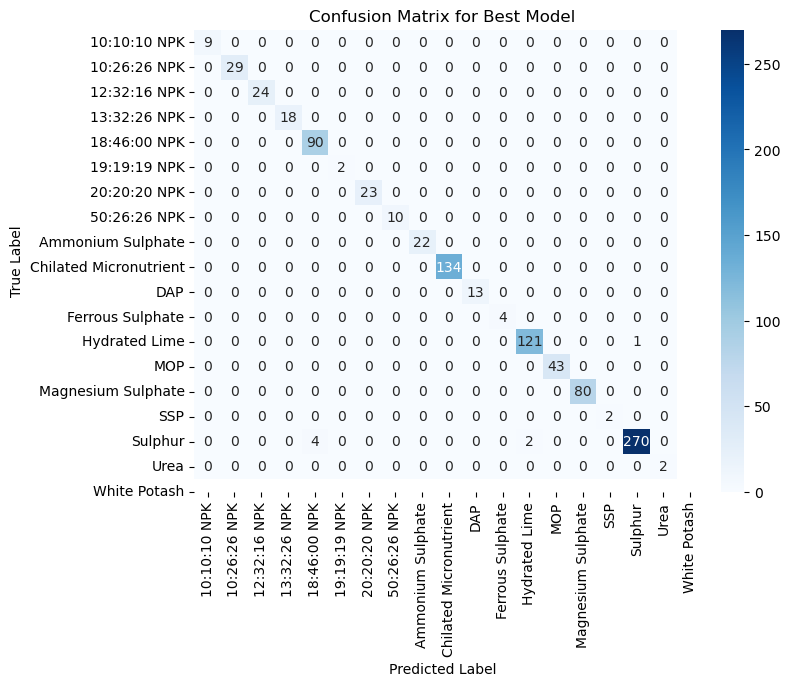

In [12]:
# Step 11: Plot confusion matrix for the best model
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=fertilizer_encoder.classes_,
            yticklabels=fertilizer_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best Model')
plt.show()

In [29]:
# Function to test the model with custom input
def test_model(model, crop_encoder, fertilizer_encoder, N, P, K, pH, Rainfall, Temperature, Crop):
    # Encode the 'Crop' feature
    crop_encoded = crop_encoder.transform([crop])[0]
    
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'pH': [pH],
        'Rainfall': [Rainfall],
        'Temperature': [Temperature],
        'Crop': [crop_encoded]
    })
    
    # Predict the fertilizer using the model
    predicted_label = model.predict(input_data)
    predicted_fertilizer = fertilizer_encoder.inverse_transform(predicted_label)[0]
    
    print("Sample Input:")
    print(input_data)
    print("Predicted Fertilizer:", predicted_fertilizer)

# Example usage of custom input
N = 140
P = 40
K = 65
pH = 6.5
Rainfall = 800
Temperature = 25
Crop = 'Cotton'  # Replace with the actual crop name from your dataset

test_model(best_model, crop_encoder, fertilizer_encoder, N, P, K, pH, Rainfall, Temperature, Crop)

Sample Input:
     N   P   K   pH  Rainfall  Temperature  Crop
0  140  40  65  6.5       800           25    11
Predicted Fertilizer: Urea


In [30]:

print("\nCrop Labels:")
for label, crop in enumerate(crop_encoder.classes_):
    print(f"{label}: {crop}")


Crop Labels:
0: Cotton
1: Ginger
2: Gram
3: Grapes
4: Groundnut
5: Jowar
6: Maize
7: Masoor
8: Moong
9: Rice
10: Soybean
11: Sugarcane
12: Tur
13: Turmeric
14: Urad
15: Wheat


In [31]:
print("Fertilizer Labels:")
for label, fertilizer in enumerate(fertilizer_encoder.classes_):
    print(f"{label}: {fertilizer}")

Fertilizer Labels:
0: 10:10:10 NPK
1: 10:26:26 NPK
2: 12:32:16 NPK
3: 13:32:26 NPK
4: 18:46:00 NPK
5: 19:19:19 NPK
6: 20:20:20 NPK
7: 50:26:26 NPK
8: Ammonium Sulphate
9: Chilated Micronutrient
10: DAP
11: Ferrous Sulphate
12: Hydrated Lime
13: MOP
14: Magnesium Sulphate
15: SSP
16: Sulphur
17: Urea
18: White Potash
